In [30]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import os
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn.metrics
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection

In [4]:
iris = sklearn.datasets.load_iris()

In [6]:
#whats in it
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
#learn about data
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
### X / features
x = iris.data
x.shape

(150, 4)

In [10]:
## y / labels
y = iris.target
y.shape

(150,)

In [11]:
boston = sklearn.datasets.load_boston()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

In [14]:
x = boston.data
x.shape

(506, 13)

In [15]:
y = boston.target
y.shape

(506,)

In [16]:
x,y = sklearn.datasets.make_blobs(n_samples=1000, n_features=2, centers=2)

In [17]:
x.shape

(1000, 2)

In [18]:
y.shape

(1000,)

In [19]:
print(x)

[[ 8.19843299  7.19731204]
 [ 2.24132278  7.64202846]
 [ 7.43582938  5.63204756]
 ...
 [ 0.13705492 10.93859697]
 [ 7.0009084   5.11387512]
 [ 7.08175831  5.32662278]]


In [20]:
print(y)

[1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1
 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0
 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0
 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0
 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1
 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 0 1 1 1 0 1 0 1 0 1 1 0 

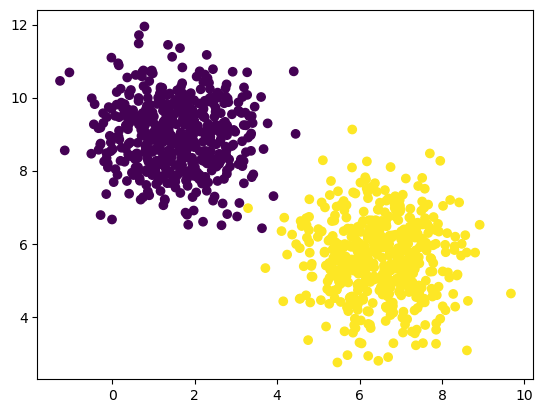

In [22]:
##plot
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show;

In [31]:
estimator = estimator.fit(data)

NameError: name 'estimator' is not defined

In [25]:
scaler = MinMaxScaler()
data = boston
scaled_data = scaler.transform(data)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [32]:
from sklearn import svm
#instantiate svm classifier
clf = svm.SVC(gamma=0.001, C=100)

#fit model to data
clf.fit(x_train, y_train) #(notice 2 params"supervised")

#make a prediction 
y_pred = clf.predict(x_test)

NameError: name 'x_train' is not defined

In [34]:
##In scikit-learn a random split into training and test sets can be quickly 
##computed with the train_test_split helper function. Let’s load the iris data set 
##to fit a linear support vector machine on it:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape


((150, 4), (150,))

In [35]:
##We can now quickly sample a training set while holding out 40% 
##of the data for testing (evaluating) our classifier:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [36]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [37]:
X_test.shape, y_test.shape

((60, 4), (60,))

In [38]:
 clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [39]:
clf.score(X_test, y_test)

0.9666666666666667

In [ ]:
##The simplest way to use cross-validation is to call the cross_val_score helper 
##function on the estimator and the dataset.

##The following example demonstrates how to estimate the accuracy of a linear 
##kernel support vector machine on the iris dataset by splitting the data, 
##fitting a model and computing the score 5 consecutive times (with dif

In [40]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [ ]:
##The mean score and the standard deviation are hence given by:

In [50]:
print(f'{scores.mean():.2%} accuracy with a standard deviation of {scores.std():.2%}')

98.00% accuracy with a standard deviation of 1.63%
